In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from pprint import pprint

# VaR and Monte Carlo simulation
there are 3 basic ways to calculate your worst loss expected = Value at Rist VaR
* historic (non parametric)
* parametric (assuming an approximation to a known probability distribution function - normal, lognormal,...)
* Monte Carlo Simulation

we start with Monte Carlo Simulation




In [1]:
import myalpha
api_key_alpha = myalpha.secret['api_key_alpha']

print(api_key_alpha)

In [6]:
#if your csv is out-dated (less than 100days)then you can update it by using update_csv
#this will retrieve the last 100days of you symbols from alpha_vantage and append the ones missing in 
#your csv - it will write back the csv file with the appended registries 

#import myalpha_util as myau
#symbol_list=['PG','SPY']
#myau.update_csv(symbol_list,api_key_alpha)

In [7]:
#compose a n-column portfolio with the daily price just as in the udemy course
#you need to have imported the csv files first - just as described earlier
import myalpha_util as myau
symbol_list=['PG']
start='2007-01-01'
end='2017-04-10'
#usecols=['timestamp','adjusted_close', 'volume']
pf_data=myau.compose_portfolio(symbol_list,start,end)
pf_data.info()
pf_data.size
print("_____________________________")
pf_data.head(1)
pf_data.tail(1)
print("_____________________________")
pf_data.describe()
len(pf_data.index)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2586 entries, 2007-01-03 to 2017-04-10
Data columns (total 1 columns):
PG    2586 non-null float64
dtypes: float64(1)
memory usage: 40.4 KB


2586

_____________________________


,PG
timestamp,
2007-01-03,43.3759


,PG
timestamp,
2017-04-10,81.6471


_____________________________


,PG
count,2586.000000
mean,55.918818
std,12.826105
min,31.262500
25%,45.565000
50%,50.519950
75%,67.329675
max,83.636100


2586

In [8]:
log_returns=np.log(pf_data / pf_data.shift(1))
log_returns.head(1)
log_returns.tail(1)
np.shape(log_returns)


,PG
timestamp,
2007-01-03,NaN


,PG
timestamp,
2017-04-10,0.002909


(2586, 1)

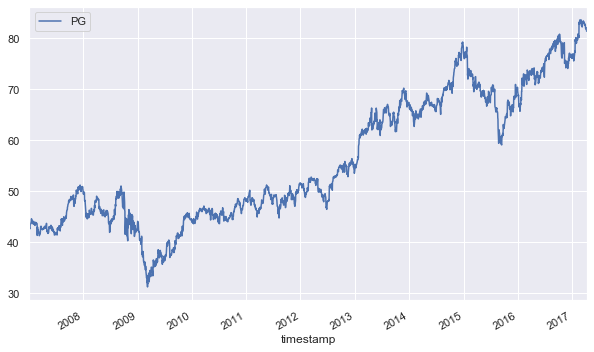

In [9]:
import seaborn as sns
sns.set()

pf_data.plot(figsize=(10,6))

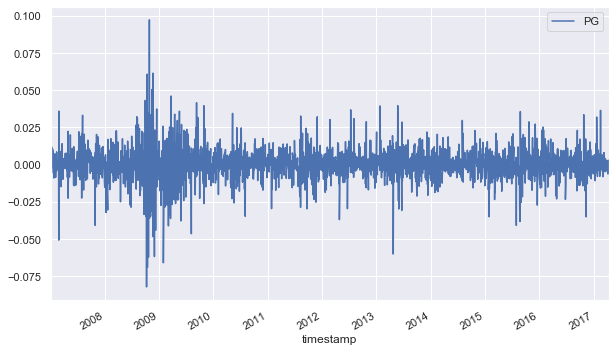

In [10]:
#we plot the returns and see that the returns are normally distributes and have a stable mean


log_returns.plot(figsize=(10,6))

array([-0.00762074, -0.00862312,  0.00220251, ..., -0.00635627,
       -0.00190336,  0.00290941])

'""hist, bin_edges = np.histogram(x, bins=\'sqrt\',density=True)\nhist\nbin_edges\nnum_bins=len(hist)\nprint(\'number of bins:\',num_bins)\nhist.sum()\nnp.diff(bin_edges)\nnp.sum(hist * np.diff(bin_edges))\n'

<Figure size 720x432 with 0 Axes>

array([ 0.10989864,  0.        ,  0.        ,  0.10989864,  0.10989864,
        0.21979729,  0.10989864,  0.        ,  0.10989864,  0.10989864,
        0.21979729,  0.32969593,  0.32969593,  1.09898644,  1.20888509,
        1.86827696,  2.19797289,  2.30787153,  5.38503358,  9.56118207,
       17.14418854, 26.81526925, 48.79499814, 53.85033579, 43.51986321,
       26.26577603, 17.91347905,  9.34138478,  4.72564171,  3.84645256,
        1.9781756 ,  1.09898644,  1.42868238,  0.87918916,  0.32969593,
        0.21979729,  0.10989864,  0.10989864,  0.        ,  0.        ,
        0.21979729,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.10989864])

array([-0.08226485, -0.07874482, -0.07522478, -0.07170474, -0.06818471,
       -0.06466467, -0.06114463, -0.0576246 , -0.05410456, -0.05058453,
       -0.04706449, -0.04354445, -0.04002442, -0.03650438, -0.03298435,
       -0.02946431, -0.02594427, -0.02242424, -0.0189042 , -0.01538417,
       -0.01186413, -0.00834409, -0.00482406, -0.00130402,  0.00221601,
        0.00573605,  0.00925609,  0.01277612,  0.01629616,  0.0198162 ,
        0.02333623,  0.02685627,  0.0303763 ,  0.03389634,  0.03741638,
        0.04093641,  0.04445645,  0.04797648,  0.05149652,  0.05501656,
        0.05853659,  0.06205663,  0.06557666,  0.0690967 ,  0.07261674,
        0.07613677,  0.07965681,  0.08317685,  0.08669688,  0.09021692,
        0.09373695,  0.09725699])

<a list of 51 Patch objects>

______


Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'my histogram')

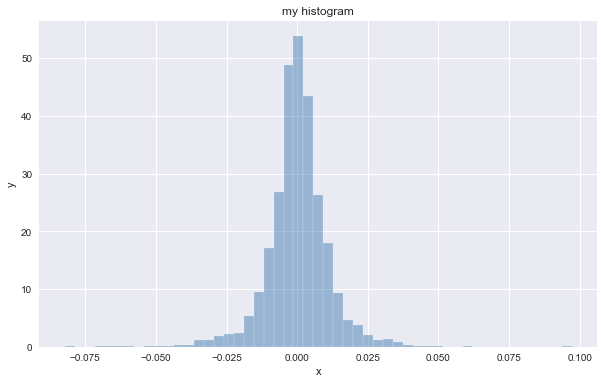

<Figure size 720x432 with 0 Axes>

Number of Bins:  (52,)


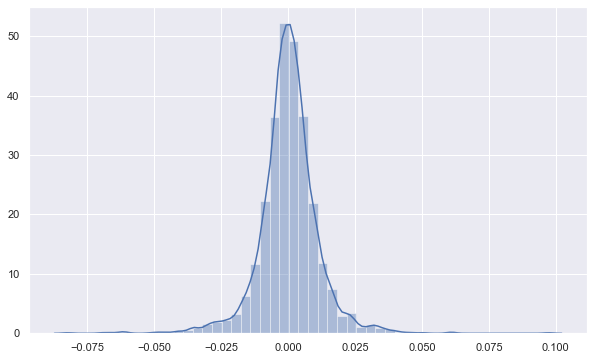

In [11]:
#with .values function create a numpy array from a panda dataframe object
#our goal is to verify with a distribution histogram that the returns a normally distributed
import seaborn as sns
sns.set()
x = log_returns['PG'].iloc[1:].values
x

"""""hist, bin_edges = np.histogram(x, bins='sqrt',density=True)
hist
bin_edges
num_bins=len(hist)
print('number of bins:',num_bins)
hist.sum()
np.diff(bin_edges)
np.sum(hist * np.diff(bin_edges))
"""""

#putting density to true is automatically normalizing values of returns 
#normalizing means that X is transformed to Z by Z=(X-u)/sigma

plt.figure(figsize=(10,6))
#plt.style.use('seaborn-whitegrid')
with plt.style.context('seaborn'):

    n, bins, patches = plt.hist(x,bins='sqrt',density=True,alpha=0.5,
                    histtype='bar', color='steelblue')
    n
    bins
    patches
    print('______')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('my histogram')
    plt.show()
    
#sns.kdeplot(x,shade=True)
plt.figure(figsize=(10,6))

sns.distplot(x)
print("Number of Bins: ", np.shape(bins))

#  Monte Carlo with BMG 
## Geometric Brownian Motion

* Calculate the drift, using the following formula: 

$$drift = u - \frac{1}{2} \cdot var$$

we will try to predict pG's daily stock price
that's why we don't annualize

In [12]:
#calculate the drift = u - 0.5*var; 
#calculating the future stock price on the basis of a normally distrib. returns functions
#yields a lognormal distribution curve for future stock prices (long right tail)
#given mean u and sigma of the unterlying normally distrib. curve (the returns function)
#the lognormal function is described too: X=e**y and y is a normal function then E(X)= e**(u+sigma**2/2)

u = log_returns.mean()
var = log_returns.var()
print(u)
print(var)

drift = u - (0.5*var)
drift


PG    0.000245
dtype: float64
PG    0.000124
dtype: float64


PG    0.000183
dtype: float64

In [13]:
stdev = log_returns.std()
stdev

PG    0.01114
dtype: float64

In [14]:
type(drift)
type(stdev)

pandas.core.series.Series

pandas.core.series.Series

In [15]:
# transform type from pandas.series to a numpy array 
drift.values
stdev.values

array([0.00018263])

array([0.0111401])

In [16]:
# use norm.ppf to get the distance between the mean and the events 
# expressed in number of standard deviations
# that number is z
norm.ppf(0.95)
# so for example an event with 95% probability will have a 1.65 multiple of stdev from the mean



1.6448536269514722

In [17]:
#for example create a 10 x 2 matrix of random probabilities:
rp= np.random.rand(10,2)
rp

array([[0.42789197, 0.685127  ],
       [0.40691458, 0.01994436],
       [0.334753  , 0.04792744],
       [0.78369945, 0.2025953 ],
       [0.48566369, 0.10219726],
       [0.77597232, 0.3995654 ],
       [0.5611323 , 0.32747545],
       [0.11138263, 0.22521977],
       [0.87505377, 0.30246459],
       [0.4553454 , 0.40475   ]])

In [18]:
#use this probability matrix to create a z matrix
Z = norm.ppf(rp)
Z

array([[-0.1817436 ,  0.4820844 ],
       [-0.23548906, -2.05489937],
       [-0.42682608, -1.66529021],
       [ 0.78474838, -0.83238687],
       [-0.03594353, -1.26913049],
       [ 0.75866102, -0.25447217],
       [ 0.15384062, -0.44689495],
       [-1.219208  , -0.75468244],
       [ 1.15061064, -0.51732519],
       [-0.11216724, -0.24107111]])

In [19]:
#now calculate daily_returns 


$$
daily\_returns = exp({drift} + {stdev} * z), 
$$ 

$$
where\  z = norm.ppf(np.random.rand(t\_intervals, iterations)
$$

`daily returns is: ln(S(t)/S0)  - if you resolve the equation you get ln(S(t)) =ln(S0)+exp(drift + stdev * z`

In [20]:

# 1000 days we are interested in forecasting stockprices in forthcoming 1000 days
# we calculate the daily returns 
t_intervals = 1000
# try out 10 scenarios or 10 series of 1000days forecasts 
iterations = 10

In [21]:
daily_returns=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.01592295, 1.00124922, 0.98644932, ..., 0.97474966, 1.00330917,
        0.995981  ],
       [0.99653226, 1.00418181, 1.00041774, ..., 1.00695982, 1.00372122,
        1.00655333],
       [0.99591561, 0.9918555 , 0.98981194, ..., 0.98691176, 1.00170698,
        1.00640552],
       ...,
       [1.00795214, 1.00974254, 1.00989234, ..., 1.00692638, 1.00594918,
        1.00338112],
       [0.99622815, 0.98909567, 1.01229295, ..., 1.00342212, 1.01761728,
        0.9910572 ],
       [0.99094367, 1.01241303, 1.0258967 , ..., 0.99775083, 1.01938275,
        0.99709772]])

In [22]:
#import numpy as np
#remember that numpy adds a number to a vector by converting the number to a vector first
np.add([1], [3, 4])

array([4, 5])

In [23]:
S0=pf_data.iloc[-1]
S0

PG    81.6471
Name: 2017-04-10 00:00:00, dtype: float64

In [24]:
price_list=np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
price_list[0]= S0
price_list

array([[81.6471, 81.6471, 81.6471, ..., 81.6471, 81.6471, 81.6471],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]])

In [26]:
#now we can replace the zeros of price_list by prices simulated by the formula
#where you take the former day of the price_list at t-1 and multiply it with daily_returns at time t
for t in range (1,t_intervals):
    price_list[t]=price_list[t-1]*daily_returns[t]

price_list
                                            

array([[ 81.6471    ,  81.6471    ,  81.6471    , ...,  81.6471    ,
         81.6471    ,  81.6471    ],
       [ 81.36396902,  81.9885324 ,  81.68120747, ...,  82.21534908,
         81.95092656,  82.1821604 ],
       [ 81.03164658,  81.32077691,  80.84903459, ...,  81.13929496,
         82.0908151 ,  82.70857998],
       ...,
       [ 65.11381955,  70.09628866, 110.1717111 , ..., 100.45589177,
         86.80084861, 147.35663376],
       [ 64.86821979,  69.33193576, 111.52604653, ..., 100.79966383,
         88.33004316, 146.03885249],
       [ 64.2807521 ,  70.19255537, 114.41420297, ..., 100.57294863,
         90.04212234, 145.61500686]])

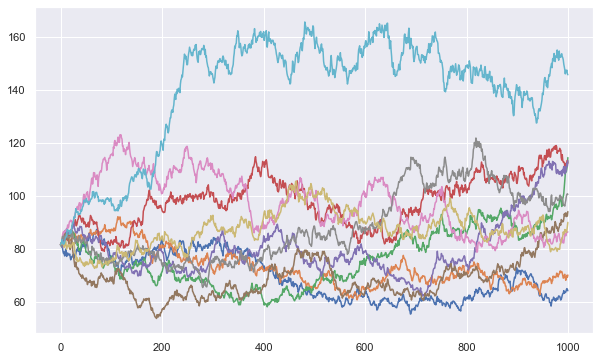

In [27]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

## the Udemy course stops here

___

**but we need to calculate VaR for more realistic Scenario**  
**here is the first way VaR - with Monte Carlo simulated data**

In [75]:
#repeat this time for 1 week - 5 business days -  t_intervals
#100 scenarios / trials /iterations/simulations
# t_intervals will start at day 0 until day 5 - day0 is simply start of Monday
t_intervals = 6
simulations = 10000
daily_returns=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_intervals,simulations)))
daily_returns
np.shape(daily_returns)
S0=pf_data.iloc[-1]
S0


array([[0.99347469, 1.00218116, 1.00794487, ..., 1.00319921, 0.99434055,
        1.00973708],
       [0.96626723, 1.00510556, 1.01637633, ..., 1.01723025, 0.99013281,
        1.01889159],
       [0.99897233, 1.00783443, 0.99902721, ..., 1.01553463, 1.01291063,
        1.00445627],
       [0.99857512, 1.01750456, 1.01523287, ..., 0.99606026, 0.99963576,
        1.01382663],
       [0.99827509, 1.00949183, 0.98489114, ..., 0.99239117, 1.00913319,
        1.01190443],
       [0.9877961 , 1.00112145, 0.99989519, ..., 1.01610672, 1.00587882,
        1.00207889]])

(6, 10000)

PG    81.6471
Name: 2017-04-10 00:00:00, dtype: float64

In [29]:
price_list=np.zeros_like(daily_returns)

np.shape(price_list)
price_list[0]= S0
price_list

(6, 10000)

array([[81.6471, 81.6471, 81.6471, ..., 81.6471, 81.6471, 81.6471],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]])

In [30]:
tp = np.array(range(0,t_intervals+1))
tp

array([0, 1, 2, 3, 4, 5, 6])

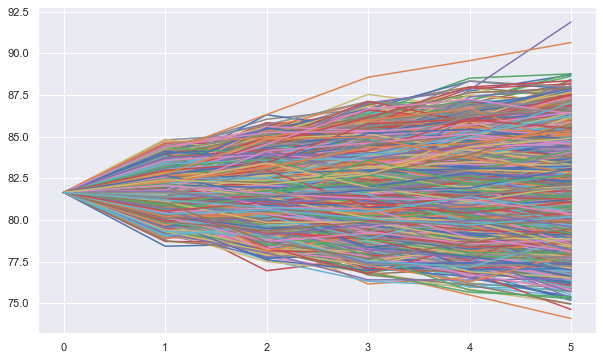

In [31]:
#now we can replace the zeros of price_list by prices simulated by the formula
#where you take the former day of the price_list at t-1 and multiply it with daily_returns at time t
for t in range (1,t_intervals):
    price_list[t]=price_list[t-1]*daily_returns[t]


plt.figure(figsize=(10,6))
plt.plot(price_list);


___

*you need to pass a list to an array first to do 2dim slicing*  
**start_row_index:end_row_index, start_column_index:end_column_index**  

*Recall that the index structure for both the row and column range is inclusive of the first index, but not the second index.mat_ar[:,0]*  

In [50]:
#take all outcomes  of  all simulations in last day and create a new series
#price_list[]

#testing the slicing of 2dim
mat=[[5,10,15],
     [20,25,30],
     [35,40,45]]
np.shape(mat)
mat = np.array(mat)
#you need to pass a list to an array first to do 2dim slicing
#[start_row_index:end_row_index, start_column_index:end_column_index]
#find all values in last column
mat[:,-1:]
#find last row all column-values
mat[2:,:]
#first row only
mat[:1,:]

(3, 3)

array([[15],
       [30],
       [45]])

array([[35, 40, 45]])

array([[ 5, 10, 15]])

___
**slicing can be complicated but look at the udemy course:**    
   * x = log_returns['PG'].iloc[1:].values

In [33]:
#likewise 
#take all outcomes in last day) and create a new series
price_listMC = price_list[-1:,:]
np.shape(price_listMC)
pl = price_listMC[0]
np.shape(pl)
pl.sort()
pl


(1, 10000)

(10000,)

array([74.09844615, 74.63813825, 74.96577468, ..., 88.78238198,
       90.64128857, 91.87288687])

In [76]:
#first day of MC (=last day of historical data)
MC_first=price_list[:1,:][0]
MC_first

array([81.6471, 81.6471, 81.6471, ..., 81.6471, 81.6471, 81.6471])

In [51]:
#devide the last prices simulated by MC (at end of day 5) by prices in first day
log_returnsMC =np.log(price_list[-1:,:] / price_list[:1,:])

np.shape(log_returnsMC)
logret=log_returnsMC[0]
logret


#x = log_returns['PG'].iloc[1:].values


(1, 10000)

array([-0.09701174, -0.08975469, -0.08537463, ...,  0.08378193,
        0.10450353,  0.11799966])

___

## plot histogram of returns (logreturns)
**show line where worst 5% of losses lie in terms of returns - see threshold**


PG    81.6471
Name: 2017-04-10 00:00:00, dtype: float64

array([2.000e+00, 1.100e+01, 3.300e+01, 1.090e+02, 2.630e+02, 4.800e+02,
       9.180e+02, 1.370e+03, 1.641e+03, 1.672e+03, 1.448e+03, 1.000e+03,
       5.580e+02, 3.060e+02, 1.170e+02, 5.600e+01, 1.400e+01, 0.000e+00,
       1.000e+00, 1.000e+00])

array([-0.09701174, -0.08626117, -0.0755106 , -0.06476003, -0.05400946,
       -0.04325889, -0.03250832, -0.02175775, -0.01100718, -0.00025661,
        0.01049396,  0.02124453,  0.0319951 ,  0.04274567,  0.05349624,
        0.06424681,  0.07499738,  0.08574795,  0.09649852,  0.10724909,
        0.11799966])

(21,)

<a list of 20 Patch objects>

______


Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'my histogram')

(array([-0.097 , -0.0863, -0.0755, -0.0648, -0.054 , -0.0433, -0.0325,
        -0.0218, -0.011 , -0.0003,  0.0105,  0.0212,  0.032 ,  0.0427,
         0.0535,  0.0642,  0.075 ,  0.0857,  0.0965,  0.1072,  0.118 ]),
 <a list of 21 Text xticklabel objects>)

1672


Text(-0.09163645402792915, 50.0, '2.0  (0.0%)')

Text(-0.0808858842896121, 50.0, '11.0  (0.1%)')

Text(-0.07013531455129507, 50.0, '33.0  (0.3%)')

Text(-0.059384744812978035, 50.0, '109.0  (1.1%)')

Text(-0.04863417507466099, 50.0, '263.0  (2.6%)')

Text(-0.03788360533634395, 50.0, '480.0  (4.8%)')

Text(-0.027133035598026913, 50.0, '918.0  (9.2%)')

Text(-0.01638246585970987, 50.0, '1,370.0  (13.7%)')

Text(-0.005631896121392838, 50.0, '1,641.0  (16.4%)')

Text(0.005118673616924203, 50.0, '1,672.0  (16.7%)')

Text(0.015869243355241244, 50.0, '1,448.0  (14.5%)')

Text(0.02661981309355828, 50.0, '1,000.0  (10.0%)')

Text(0.03737038283187531, 50.0, '558.0  (5.6%)')

Text(0.04812095257019236, 50.0, '306.0  (3.1%)')

Text(0.05887152230850941, 50.0, '117.0  (1.2%)')

Text(0.06962209204682644, 50.0, '56.0  (0.6%)')

Text(0.08037266178514348, 50.0, '14.0  (0.1%)')

Text(0.09112323152346051, 50.0, '0.0  (0.0%)')

Text(0.10187380126177756, 50.0, '1.0  (0.0%)')

Text(0.11262437100009459, 50.0, '1.0  (0.0%)')

Text(-0.040698146676999336, 1254.0, '-0.0407')

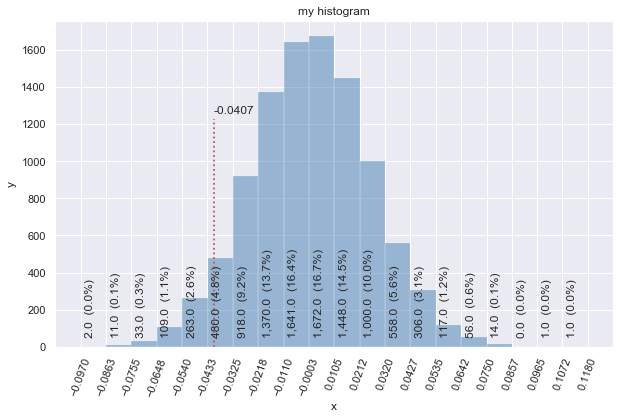

In [52]:
import matplotlib.ticker as ticker

S0
#plt.figure(figsize=(10,6))

fig, ax = plt.subplots(figsize=(10, 6))


x=logret

fifth, twentyfifth, seventyfifth, ninetyfifth = np.percentile(x, [5, 25, 75, 95])



#plt.style.use('seaborn-whitegrid')

numBins = 20
with plt.style.context('seaborn'):
     
    counts, bins, patches = plt.hist(x,bins=numBins,density=None,
                    histtype='bar', color = 'steelblue', alpha=0.5)
    counts
    bins
    np.shape(bins)
    patches
    print('______')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('my histogram') 
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins.round(4))
    plt.xticks(rotation=70)
    
    #draw vertical line at x that corresponds to 5% percentile; draw the x-value at 3/4 of the height of the plot
    fifth2=round(fifth,4)
    print(int(np.max(counts)))
    y_at_fifth = int(np.max(counts))*0.75
    
    # Calculate bar centre to display the count of data points and %
    bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
    bin_y_centers = ax.get_yticks()[1] * 0.25

    # Display the the count of data points and % for each bar in histogram
    for i in range(len(bins)-1):
        bin_label = "{0:,}".format(counts[i]) + "  ({0:,.1f}%)".format((counts[i]/counts.sum())*100)
        plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')
    
    
    #print(y_at_fifth)
    plt.axvline(fifth2, 0,0.7, color='r', linestyle=":",label ='5%')
    ax.annotate(fifth2, xy=(fifth, y_at_fifth))
  
    
    start, end = ax.get_xlim()
    #ax.xaxis.set_ticks(np.arange(start, end, 0.6))
    #ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3f'))
    plt.show()

___
## show histogram of price this is suppose to be a lognormal distribution  
although really doesn't look like it...we have to use lognormal distributions  
**threshold of 5% worst days trades is shown in terms of stock price**

PG    81.6471
Name: 2017-04-10 00:00:00, dtype: float64

percentiles in 5% steps:  [78.39102471 79.15069361 79.6223964  80.01704701 80.34829349 80.6466042
 80.89992401 81.16779783 81.44625477 81.71916864 81.98809532 82.23835179
 82.50845657 82.78702044 83.07820107 83.44086875 83.85426674 84.36528302
 85.20309906]
_________________________________________


array([4.000e+00, 1.500e+01, 4.900e+01, 1.450e+02, 3.690e+02, 6.970e+02,
       1.173e+03, 1.612e+03, 1.655e+03, 1.651e+03, 1.160e+03, 7.460e+02,
       4.140e+02, 1.870e+02, 8.100e+01, 3.300e+01, 7.000e+00, 0.000e+00,
       1.000e+00, 1.000e+00])

array([74.09844615, 74.98716819, 75.87589022, 76.76461226, 77.65333429,
       78.54205633, 79.43077837, 80.3195004 , 81.20822244, 82.09694447,
       82.98566651, 83.87438855, 84.76311058, 85.65183262, 86.54055465,
       87.42927669, 88.31799872, 89.20672076, 90.0954428 , 90.98416483,
       91.87288687])

(21,)

<a list of 20 Patch objects>

______


Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'my histogram')

(array([74.1 , 74.99, 75.88, 76.76, 77.65, 78.54, 79.43, 80.32, 81.21,
        82.1 , 82.99, 83.87, 84.76, 85.65, 86.54, 87.43, 88.32, 89.21,
        90.1 , 90.98, 91.87]), <a list of 21 Text xticklabel objects>)

1655


Text(74.54280716721738, 50.0, '4.0  (0.0%)')

Text(75.43152920320264, 50.0, '15.0  (0.1%)')

Text(76.32025123918791, 50.0, '49.0  (0.5%)')

Text(77.20897327517315, 50.0, '145.0  (1.5%)')

Text(78.09769531115842, 50.0, '369.0  (3.7%)')

Text(78.98641734714369, 50.0, '697.0  (7.0%)')

Text(79.87513938312892, 50.0, '1,173.0  (11.7%)')

Text(80.76386141911419, 50.0, '1,612.0  (16.1%)')

Text(81.65258345509945, 50.0, '1,655.0  (16.6%)')

Text(82.5413054910847, 50.0, '1,651.0  (16.5%)')

Text(83.43002752706997, 50.0, '1,160.0  (11.6%)')

Text(84.3187495630552, 50.0, '746.0  (7.5%)')

Text(85.20747159904047, 50.0, '414.0  (4.1%)')

Text(86.09619363502574, 50.0, '187.0  (1.9%)')

Text(86.98491567101098, 50.0, '81.0  (0.8%)')

Text(87.87363770699625, 50.0, '33.0  (0.3%)')

Text(88.76235974298152, 50.0, '7.0  (0.1%)')

Text(89.65108177896676, 50.0, '0.0  (0.0%)')

Text(90.53980381495202, 50.0, '1.0  (0.0%)')

Text(91.42852585093729, 50.0, '1.0  (0.0%)')

Text(78.39092394692537, 1241.25, '78.39')

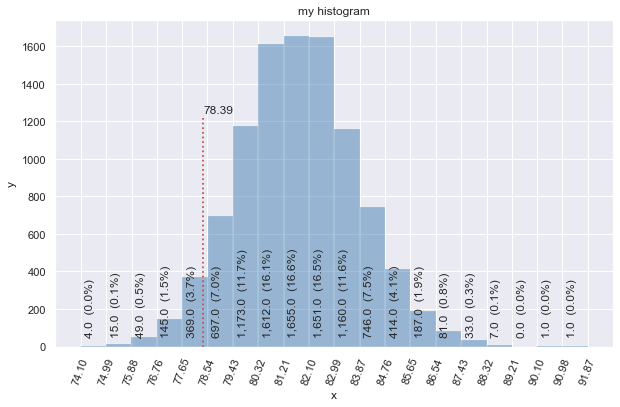

<Figure size 720x432 with 0 Axes>

Text(78.39092394692537, 1241.25, '78.39')

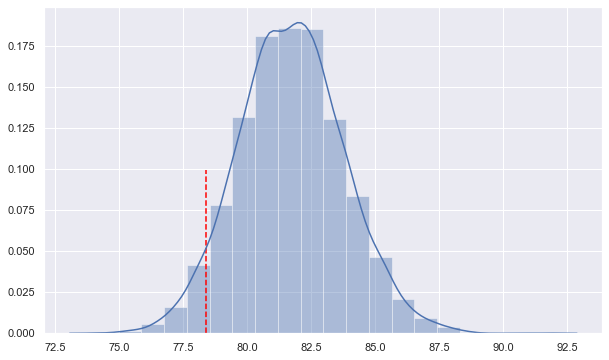

In [53]:
import matplotlib.ticker as ticker

S0
x=pl
#plt.figure(figsize=(10,6))

fig, ax = plt.subplots(figsize=(10, 6))

#just for kicks calculate percentiles in 5% steps
pBins=[] 
pSize=np.size(x)
for i in range(0,100,5):
    if i!=0:
        limit = x[int(pSize* i/100)]
        pBins.append(limit)

percentiles=np.array(pBins)
fifth=percentiles[0]
print("percentiles in 5% steps: ", percentiles)
print("_________________________________________")


fifth, twentyfifth, seventyfifth, ninetyfifth = np.percentile(x, [5, 25, 75, 95])



#plt.style.use('seaborn-whitegrid')

numBins = 20
with plt.style.context('seaborn'):
     
    counts, bins, patches = plt.hist(x,bins=numBins,density=None,
                    histtype='bar', color = 'steelblue', alpha=0.5)
    counts
    bins
    np.shape(bins)
    patches
    print('______')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('my histogram') 
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins.round(2))
    plt.xticks(rotation=70)
    
    #draw vertical line at x that corresponds to 5% percentile; draw the x-value at 3/4 of the height of the plot
    fifth2=round(fifth,2)
    print(int(np.max(counts)))
    y_at_fifth = int(np.max(counts))*0.75
    
    # Calculate bar centre to display the count of data points and %
    bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
    bin_y_centers = ax.get_yticks()[1] * 0.25

    # Display the the count of data points and % for each bar in histogram
    for i in range(len(bins)-1):
        bin_label = "{0:,}".format(counts[i]) + "  ({0:,.1f}%)".format((counts[i]/counts.sum())*100)
        plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')
    
    
    #print(y_at_fifth)
    plt.axvline(fifth2, 0,0.7, color='r', linestyle=":",label ='5%')
    ax.annotate(fifth2, xy=(fifth, y_at_fifth))
  
    
    start, end = ax.get_xlim()
    #ax.xaxis.set_ticks(np.arange(start, end, 0.6))
    #ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    plt.show()
    
#sns.kdeplot(x,shade=True)
plt.figure(figsize=(10,6))

plt.axvline(fifth,ymin=0, ymax=0.5, color="red",  linestyle="--", label='5%');
ax.annotate(fifth2, xy=(fifth, y_at_fifth))

sns.distplot(x,numBins)


___
## VaR and aVar from Monte Carlo Simulation
**VaR value at risk and aVar is absolute Value at risk**
**non parametric method (not historic given that the results are simulated)

there are three basic methods for VaR:
* historic
* parametric
* Monte Carlo

in parametric approach:
we can calculate VaR with Returns assuming normal distribution 
or we can calculate VaR based on Stock-prices assuming lognormal distribution



In [54]:
#VaR value at risk of 10000 values at confidence level 95% for a 5 day period up to 499th value
# the 500th value is the 5% threshold = VaR

x=logret
#x=pl

np.shape(x)
np.size(x)
S0
print("___________")
significance = 0.05
print("confidence Level:", 1-significance)
print("significance Level:", significance)
VaRq = np.quantile(x,significance)
print("calculated 5% quantile left:",round(VaRq*100,2),'%')
VaR = x[int(np.size(x)*significance)]
print("5% quantile point in series:",VaR)
print("___________")
aVaR= S0[0] + VaR*S0[0]
print("absolute VaR: ", aVaR)
print("___________")


#create array of percentiles in 5% steps
pBins=[] 
pSize=np.size(x)
for i in range(0,100,5):
    if i!=0:
        limit = x[int(pSize* i/100)]
        pBins.append(limit)

np.array(pBins)
    


(10000,)

10000

PG    81.6471
Name: 2017-04-10 00:00:00, dtype: float64

___________
confidence Level: 0.95
significance Level: 0.05
calculated 5% quantile left: -4.07 %
5% quantile point in series: -0.040696861324214705
___________
absolute VaR:  78.3243192937757
___________


array([-0.04069686, -0.03105275, -0.02511089, -0.0201666 , -0.01603545,
       -0.0123296 , -0.00919342, -0.00588771, -0.00246295,  0.0008823 ,
        0.00416776,  0.00721546,  0.01049449,  0.01386499,  0.01737604,
        0.02173192,  0.02667407,  0.03274968,  0.04263151])


___
## historical VaR calculation based on empirical data in timeframe of logreturns

In [55]:
#calculate VaR (e.g worst 5% with confidence level of 95% for a week)
# number of business days in dataframe
len(pf_data.index)
len(log_returns.index)
#build an array of log returns
x = log_returns['PG'].iloc[1:].values
x.sort()
x
fifth, twentyfifth, seventyfifth, ninetyfifth = np.percentile(x, [5, 25, 75, 95])
fifth
day = round ((fifth * 100), 2)
print('VaR expected in a day: ', day)
# in a week
weekly = day * 5
print("VaR expected in a week:", weekly,'%')




2586

2586

array([-0.08226485, -0.06910288, -0.06602743, ...,  0.06074376,
        0.06144541,  0.09725699])

-0.016501727867690344

VaR expected in a day:  -1.65
VaR expected in a week: -8.25 %


___
## parametric VaR calculation - normal VaR of Returns - data simulated by MC 
**data simulated by Monte Carlo!**



In [56]:
#we need the mean and standard deviation of the returns of monte-carlo simulation
#beware that the logret are returns on a weekly basis!
#with returns we can apply normal distribution
#if you would use prices instead of returns you would need to estimate the lognormal VaR
x=logret
x
x.mean()
x.std()
deviate_multiplier = norm.ppf(0.05)

#mean is almost 0 so we do not take it into account
fifth_weekly = x.mean() - x.std() * deviate_multiplier
# or which is mathematically more correct: fifth = -x.mean + x.std() * norm.ppf(0.05)
print("VaR expected in a week:", round((fifth_weekly *100),2),'%')

array([-0.09701174, -0.08975469, -0.08537463, ...,  0.08378193,
        0.10450353,  0.11799966])

0.0007808812995060812

0.025144188959892094

VaR expected in a week: 4.21 %


___
## parametric VaR calculation - based on historic returns 
**data as available in dataframe**

In [57]:
x = log_returns['PG'].iloc[1:].values
x.mean()
x.std()
#confidence level = 95% - significance = 5%
#x are daily returns
deviate_multiplier = norm.ppf(0.05)
fifth_daily = x.mean() - x.std() * deviate_multiplier
fifth_daily
delta_T = 5
fifth_weekly = x.mean()* delta_T - x.std() * deviate_multiplier * delta_T**0.5
fifth_weekly
print("VaR expected in a week parametric/historic returns:", round(fifth_weekly *100,2),'%')



0.0002446817462289641

0.011137940826987594

0.018564964112270394

0.042188805468604144

VaR expected in a week parametric/historic returns: 4.22 %


## create CDF - cumulative Distribution Function with empirical data


[       -inf -0.09701174 -0.08975469 ...  0.08378193  0.10450353
  0.11799966]
[0.000e+00 1.000e-04 2.000e-04 ... 9.998e-01 9.999e-01 1.000e+00]
P(x<78.9): 1.000


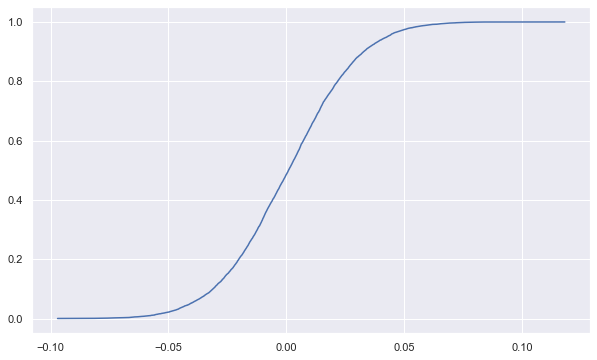

In [58]:
from statsmodels.distributions.empirical_distribution import ECDF
#x=pl
x=logret
ecdf = ECDF(x)
print(ecdf.x)
print(ecdf.y)
# get cumulative probability for values
print('P(x<78.9): %.3f' % ecdf(78.9))

#print(y_at_fifth)    
fifth, twentyfifth, seventyfifth, ninetyfifth = np.percentile(x, [5, 25, 75, 95])



# plot the cdf
fig, ax = plt.subplots(figsize=(10,6))
#plt.axvline(fifth2, 0,0.7, color='r', label ='5%')
#ax.annotate(fifth2, xy=(fifth, y_at_fifth))

plt.plot(ecdf.x, ecdf.y)


In [ ]:
from scipy.stats import lognorm, norm
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1,sharey=False, figsize=[10,6])


#sigma=1 and variance is 1
s = 1
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

y = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
y
ax.plot(y, lognorm.pdf(y, s),
       'r-', lw=2, alpha=0.5, label='lognorm pdf')
ax.plot(y, lognorm.cdf(y, s),
       'b-', lw=2, alpha=0.5, label='lognorm pdf')


#y is lognormal if y=exp(x) with x being a normally distributed variable
x = np.log(y)
x
mean, var, skew, kurt = norm.stats(moments='mvsk')
ax.plot(x, norm.pdf(x),
       'g-', lw=3, alpha=0.5, label='norm pdf')

 Alternatively, the "multiplicative" or "geometric" parameters {\displaystyle \mu ^{*}=e^{\mu }}{\displaystyle \mu ^{*}=e^{\mu }} and {\displaystyle \sigma ^{*}=e^{\sigma }}{\displaystyle \sigma ^{*}=e^{\sigma }} can be used. They have a more direct interpretation: {\displaystyle \mu ^{*}}\mu ^{*} is the median of the distribution, and {\displaystyle \sigma ^{*}}\sigma ^{*} is useful for determining "scatter" intervals, see below.

(1, 10000)

array([-0.09701174, -0.08975469, -0.08537463, ...,  0.08378193,
        0.10450353,  0.11799966])

0.0007808812995060812

0.025144188959892094

0.0006322302384507595

array([-3.8892732 , -3.60065579, -3.42645813, ...,  3.30100314,
        4.12511418,  4.66186341])

81.6471

array([2.04602112e-02, 2.73058098e-02, 3.25018543e-02, ...,
       2.71398502e+01, 6.18748736e+01, 1.05833109e+02])

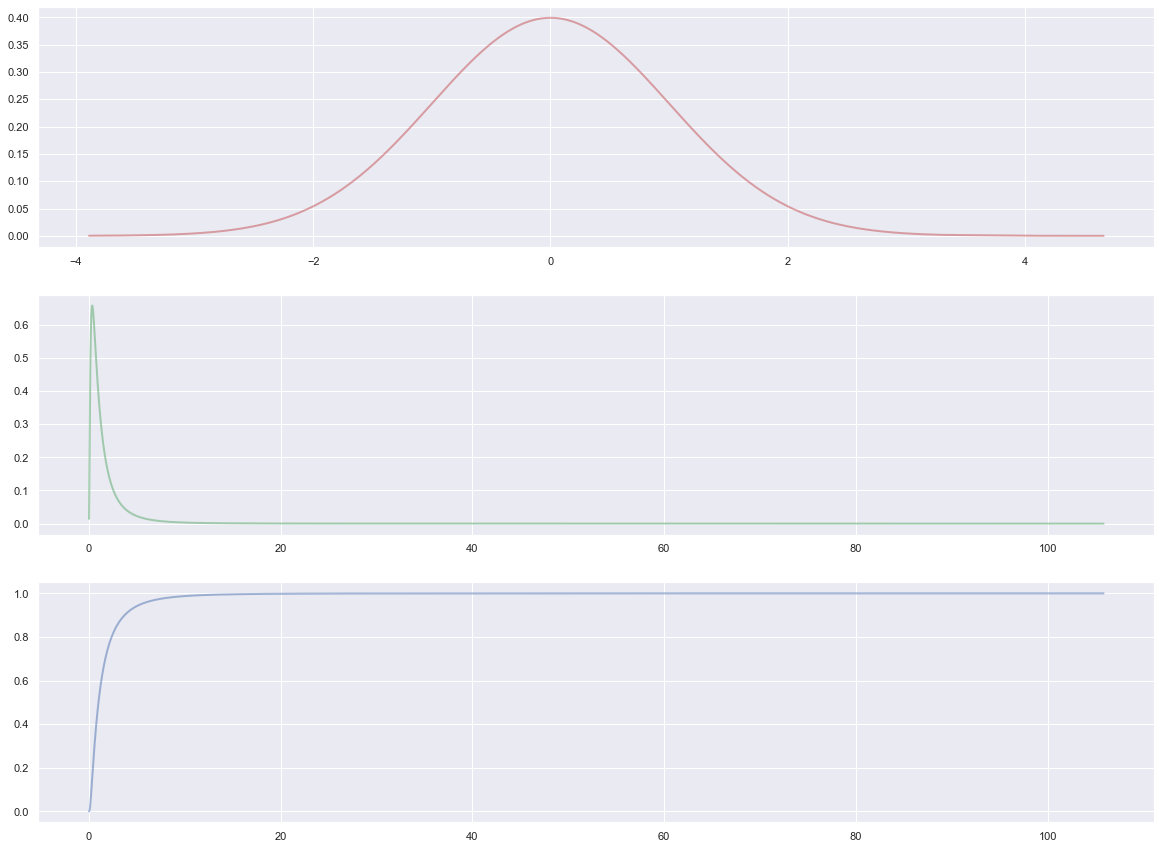

In [127]:
from scipy.stats import lognorm, norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#devide the last prices simulated by MC (at end of day 5) by prices in first day
log_returnsMC =np.log(price_list[-1:,:] / price_list[:1,:])

np.shape(log_returnsMC)
logret=log_returnsMC[0]
a=logret
#now standardize a
#we need u and sigma of normally distributed returns
u = np.mean(a)
sigma = np.std(a)

a
u
sigma
sigma**2
y=(a-u)/sigma
y


#lognormal
#Alternatively, the "multiplicative" or "geometric" parameters 
s=np.exp(sigma)
mu=np.exp(u)
x=np.exp(y)

#parametric approach
#y=S(t)/S0 is lognormally distributed
#s=sigma = standard dev
#first day of MC (=last day of historical data)
#logret
MC_first=price_list[:1,:][0]
MC_first[0]

s=np.exp(sigma)
#x=np.exp(a+y*sigma)
x=np.exp(y)
#x=x*MC_first[0]
x


fig, (ax,ax2,ax3) = plt.subplots(3, 1, figsize=[20,15])

ax.plot(y, norm.pdf(y),
       'r-', lw=2, alpha=0.5, label='norm pdf')


ax2.plot(x, lognorm.pdf(x, s, 0,mu),
       'g-', lw=2, alpha=0.5, label='lognorm pdf')

ax3.plot(x, lognorm.cdf(x, s,0,mu),
       'b-', lw=2, alpha=0.5, label='lognorm cdf')


